In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [9]:
df = pd.read_csv("diabetes_prediction_dataset.csv",sep=',')

## Data information

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


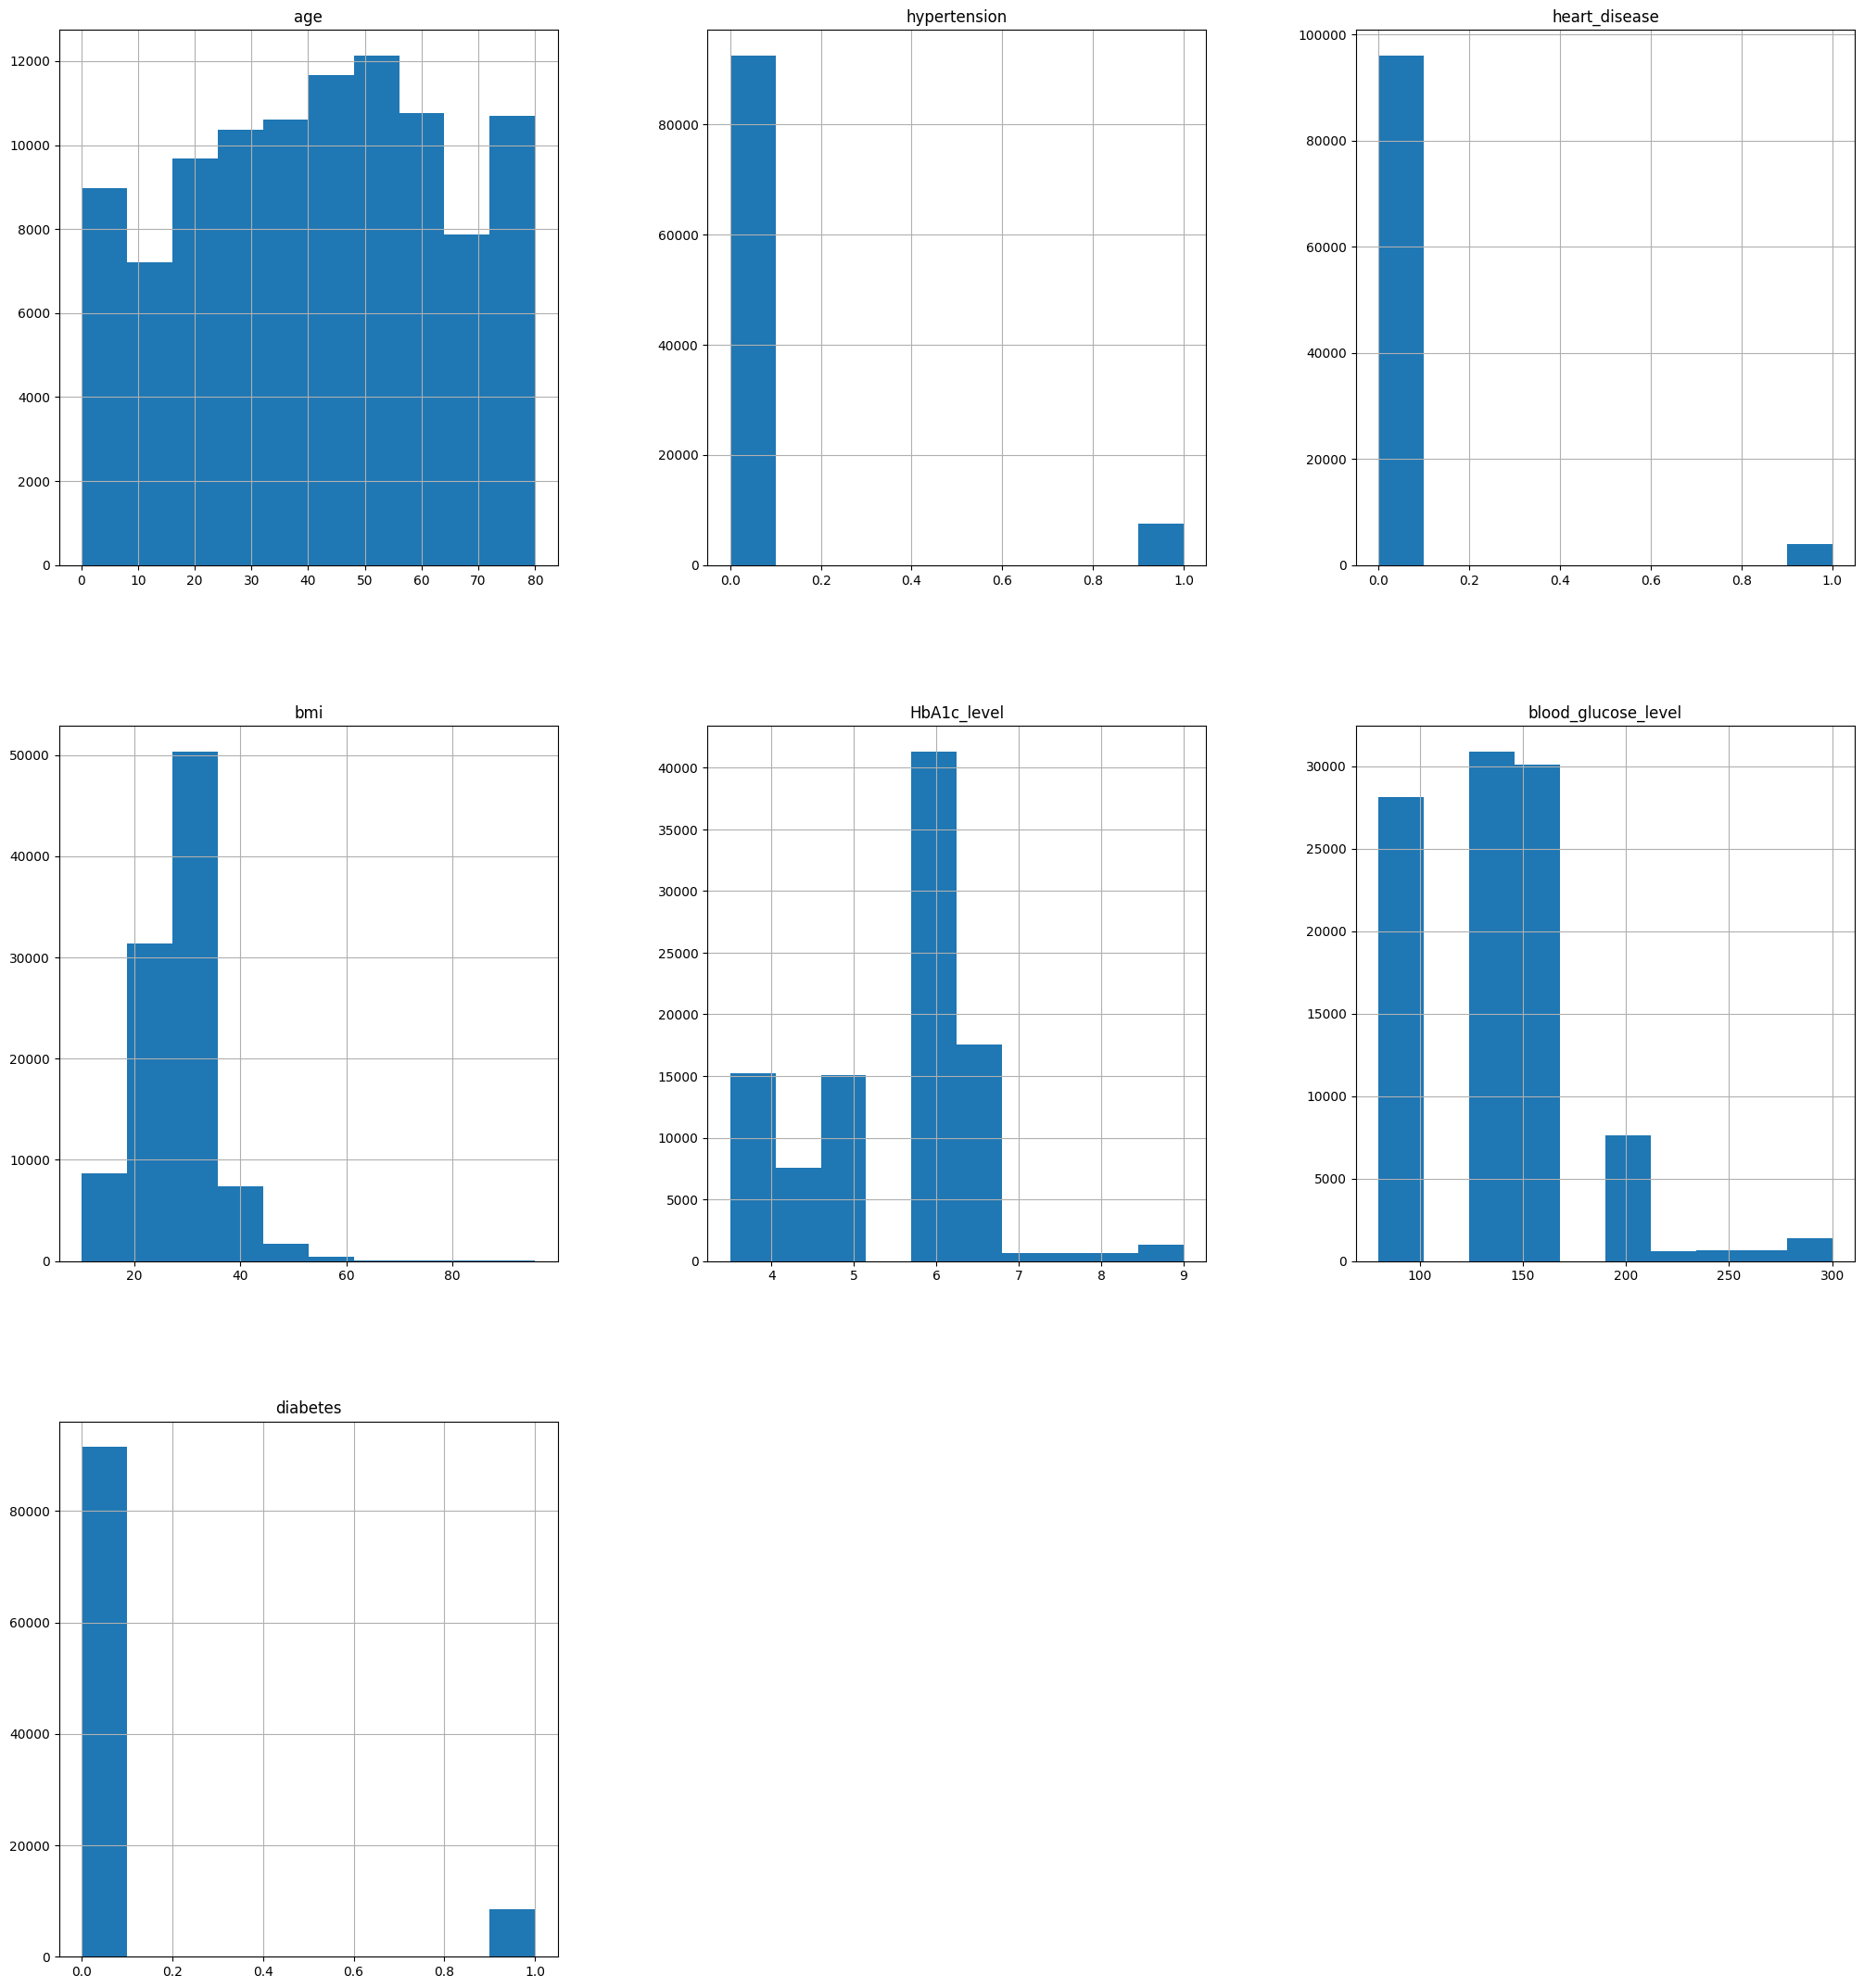

In [14]:
df.hist(figsize=(25,27))
plt.show()

In [15]:
print(df['smoking_history'].unique())
print(df['diabetes'].unique())
print(df['gender'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']
[0 1]
['Female' 'Male' 'Other']


## Pre-proccessing

In [16]:
def add_engineered_features(df):
    df = df.copy()
    # 1. Interaction features
    # df['age_bmi'] = df['age'] * df['bmi']
    # df['hba1c_glucose'] = df['HbA1c_level'] * df['blood_glucose_level']

    # # 2. Ratios / relative features
    # df['bmi_per_age'] = df['bmi'] / df['age'].replace(0, 1)  # avoid division by zero
    # df['glucose_per_hba1c'] = df['blood_glucose_level'] / df['HbA1c_level'].replace(0, 1)

    # # 3. Binary / threshold flags
    # df['age_high'] = (df['age'] > 45).astype(int)
    # df['obese'] = (df['bmi'] >= 30).astype(int)
    # df['high_hba1c'] = (df['HbA1c_level'] >= 6.5).astype(int)
    # df['high_glucose'] = (df['blood_glucose_level'] > 126).astype(int)

    # -------------------------
    # 4. Encode categorical / smoking
    df['smoker'] = df['smoking_history'].replace({
        'never': 0, 'former': .75, 'current': 1, 'No Info': 0, 'ever': 0, 'not current': .25
    })

    # -------------------------
    # 5. Comorbidity score
    #df['comorbidity'] = df['hypertension'] + df['heart_disease'] + df['smoker']

    # # -------------------------
    # # 6. Age groups / buckets
    # df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=[0, 1, 2, 3])

    # -------------------------
    # # 7. Weighted risk score (example)
    # df['risk_score'] = 0.3*df['bmi'] + 0.4*df['age'] + 0.3*df['high_hba1c']
    return df


df = add_engineered_features(df)
df = df.drop('smoking_history',axis=1).copy()
df.head()

C:\Users\iCFixer.ir\AppData\Local\Temp\ipykernel_17012\646450244.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoking_history'].replace({


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoker
0,Female,80.0,0,1,25.19,6.6,140,0,0.0
1,Female,54.0,0,0,27.32,6.6,80,0,0.0
2,Male,28.0,0,0,27.32,5.7,158,0,0.0
3,Female,36.0,0,0,23.45,5.0,155,0,1.0
4,Male,76.0,1,1,20.14,4.8,155,0,1.0


In [17]:
X = df.drop('diabetes',axis=1).copy()
y = df['diabetes'].copy()

In [18]:
#convert these categorical variables
X_encoded = pd.get_dummies(X,columns=['gender']).astype(float)
X_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoker,gender_Female,gender_Male,gender_Other
0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,1.0,0.0,0.0
1,54.0,0.0,0.0,27.32,6.6,80.0,0.0,1.0,0.0,0.0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,1.0,0.0
3,36.0,0.0,0.0,23.45,5.0,155.0,1.0,1.0,0.0,0.0
4,76.0,1.0,1.0,20.14,4.8,155.0,1.0,0.0,1.0,0.0


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)

In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Gaussian Naive Bayes

$$
\mathcal{N}(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} 
\exp \left( -\tfrac{1}{2} (\frac{x-\mu}{\sigma})^2 \right)
$$


Class Priors: {np.int64(0): np.float64(0.9153333333333333), np.int64(1): np.float64(0.08466666666666667)}
{np.int64(0): array([0.98091938, 0.80638828, 0.74884166, 0.92349878, 0.82058808,
       0.70651581, 0.9676234 , 0.99637348, 0.99634946, 1.09247662]), np.int64(1): array([4.19906913e-01, 2.64570669e+00, 3.35860537e+00, 1.29945525e+00,
       1.02296766e+00, 2.07451097e+00, 1.26359232e+00, 1.02573873e+00,
       1.02589118e+00, 9.00399332e-31])}


C:\Users\iCFixer.ir\AppData\Local\Temp\ipykernel_17012\3871845154.py:27: RuntimeWarning: divide by zero encountered in log
  likelihoods = np.sum(np.log(gaussian_pdf(x, means[c], vars_[c])))


Accuracy: 0.915


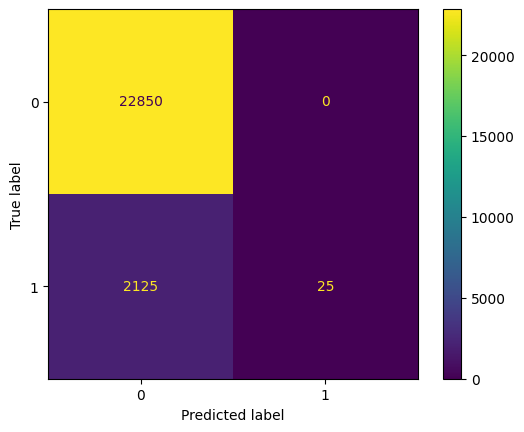

Precision: 1.0000
Accuracy: 0.9150
Sensitivity (Recall): 0.0116


In [23]:
classes = np.unique(y_train)
priors = {c: np.mean(y_train == c) for c in classes}
print("Class Priors:", priors)

means = {}
vars_ = {}
for c in classes:
    X_c = X_train_scaled[y_train == c]
    means[c] = np.mean(X_c, axis=0)
    vars_[c] = np.var(X_c, axis=0)

print(vars_)
def gaussian_pdf(x, mean, var):
    eps = 1e-6  # avoid division by zero
    coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
    exponent = np.exp(- (x - mean)**2 / (2 * var + eps))
    return coeff * exponent

def predict(X):
    y_pred = []
    for x in X:
        posteriors = []
        for c in classes:
            # Start with prior
            posterior = np.log(priors[c])
            # Multiply likelihoods of each feature (use log to avoid underflow)
            likelihoods = np.sum(np.log(gaussian_pdf(x, means[c], vars_[c])))
            posterior += likelihoods
            posteriors.append(posterior)
        y_pred.append(classes[np.argmax(posteriors)])
    return np.array(y_pred)


y_pred =predict(X_test_scaled)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
plot_confusion_mat(y_test,y_pred)

In [22]:
def plot_confusion_mat(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    # Calculate precision, accuracy, and sensitivity
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    
    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')


## Gaussian Generative Model

### LDA (Linear Discriminant Analysis)


Gaussian PDF for class c,using shared covariance 

$$
\mathcal{N}(x \mid \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} 
\exp \left( -\tfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
$$

The log-posterior (up to constant terms):

$$
\delta_c(x) \;=\; x^T \Sigma^{-1} \mu_c 
\;-\; \tfrac{1}{2} \mu_c^T \Sigma^{-1} \mu_c 
\;+\; \log P(y=c)
$$


Class Priors: {np.int64(0): np.float64(0.9153333333333333), np.int64(1): np.float64(0.08466666666666667)}
LDA Accuracy: 0.95572


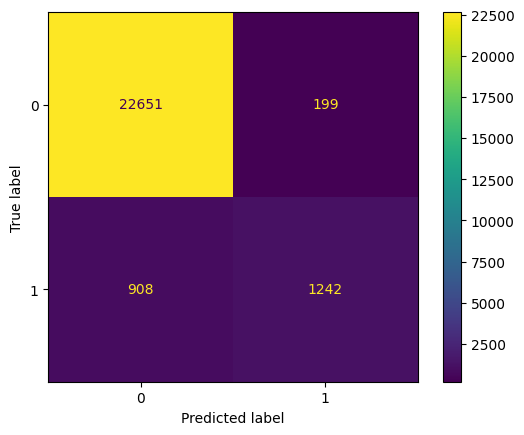

Precision: 0.8619
Accuracy: 0.9557
Sensitivity (Recall): 0.5777


In [24]:

#Priors
classes = np.unique(y_train)
priors = {c: np.mean(y_train == c) for c in classes}
print("Class Priors:", priors)

#Means for each class
means = {}
for c in classes:
    X_c = X_train_scaled[y_train == c]
    means[c] = np.mean(X_c, axis=0)

#Shared covariance matrix
cov = np.zeros((X_train_scaled.shape[1], X_train_scaled.shape[1]))
for c in classes:
    X_c = X_train_scaled[y_train == c]
    diff = X_c - means[c]
    cov += diff.T @ diff
cov /= (len(X_train_scaled) - len(classes))   # unbiased estimate
cov_inv = np.linalg.inv(cov)

def lda_predict(input):
    y_pred = []
    for x in input:
        scores = []
        for c in classes:
            mu = means[c]
            term1 = x @ cov_inv @ mu
            term2 = -0.5 * mu @ cov_inv @ mu
            term3 = np.log(priors[c])
            score = term1 + term2 + term3
            scores.append(score)
        y_pred.append(classes[np.argmax(scores)])
    return np.array(y_pred)

y_pred = lda_predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print("LDA Accuracy:", accuracy)

plot_confusion_mat(y_test=y_test,y_pred=y_pred)

### QDA (Quadratic Discriminant Analysis)

Gaussian PDF for class c,using class-specific covariance 

$$
p(x \mid y=c) = \frac{1}{(2\pi)^{d/2} \, |\Sigma_c|^{1/2}} 
\exp \left( -\tfrac{1}{2} (x - \mu_c)^T \Sigma_c^{-1} (x - \mu_c) \right)
$$

The loss function (to estimate parameters by MLE) is the negative log-likelihood:

$$
\mathcal{L}(\{\mu_c, \Sigma_c, \pi_c\}) 
= - \sum_{n=1}^N \log \Big[ \, p(x^{(n)} \mid y^{(n)}) \, P(y^{(n)}) \Big]
$$


GDA Accuracy: 0.914


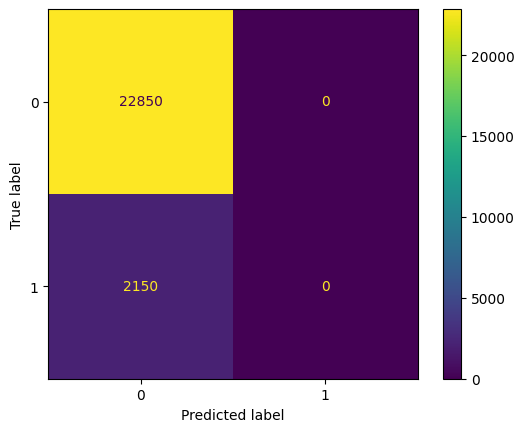

Precision: 0.0000
Accuracy: 0.9140
Sensitivity (Recall): 0.0000


c:\Users\iCFixer.ir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
import numpy as np

classes = np.unique(y_train)
priors = {c: np.mean(y_train == c) for c in classes}

means = {}
covs = {}

# Compute class-specific means and covariances
for c in classes:
    X_c = X_train_scaled[y_train == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

def gda_predict(X):
    y_pred = []
    for x in X:
        scores = []
        for c in classes:
            mu = means[c]
            cov_c = covs[c]
            cov_inv = np.linalg.inv(cov_c)
            det_cov = np.linalg.det(cov_c)

            # Quadratic discriminant score
            diff = x - mu
            term1 = -0.5 * diff.T @ cov_inv @ diff
            term2 = -0.5 * np.log(det_cov + 1e-9)  # avoid log(0)
            term3 = np.log(priors[c])
            score = term1 + term2 + term3
            scores.append(score)
        y_pred.append(classes[np.argmax(scores)])
    return np.array(y_pred)

# Evaluate
y_pred = gda_predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print("GDA Accuracy:", accuracy)

plot_confusion_mat(y_test, y_pred)


## PCA

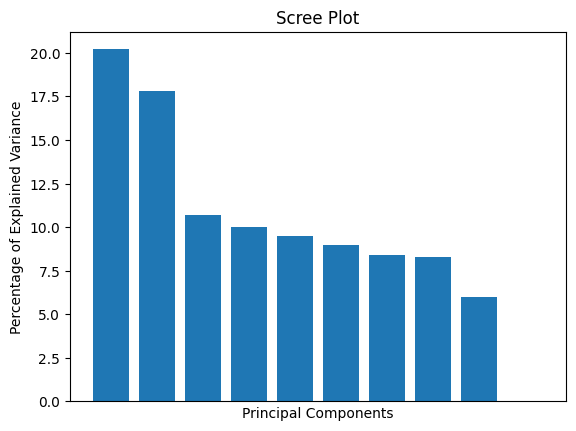

In [26]:
pca= PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
axis='x',# changes apply to the x-axis
which='both',# both major and minor ticks are affected
bottom=False,# ticks along the bottom edge are off
top=False,# ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [27]:
pca_train_scaled = scaler.fit_transform(np.vstack((X_train_pca[:,0], X_train_pca[:,1])).T)

Class Priors: {np.int64(0): np.float64(0.9153333333333333), np.int64(1): np.float64(0.08466666666666667)}


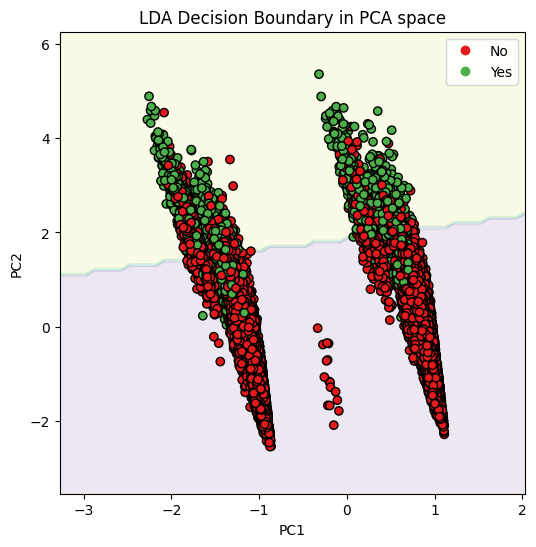

In [28]:
classes = np.unique(y_train)
priors = {c: np.mean(y_train == c) for c in classes}
print("Class Priors:", priors)

#Means for each class
means = {}
for c in classes:
    X_c = pca_train_scaled[y_train == c]
    means[c] = np.mean(X_c, axis=0)

#Shared covariance matrix
cov = np.zeros((pca_train_scaled.shape[1], pca_train_scaled.shape[1]))
for c in classes:
    X_c = pca_train_scaled[y_train == c]
    diff = X_c - means[c]
    cov += diff.T @ diff
cov /= (len(pca_train_scaled) - len(classes))   # unbiased estimate
cov_inv = np.linalg.inv(cov)

def lda_predict(input):
    y_pred = []
    for x in input:
        scores = []
        for c in classes:
            mu = means[c]
            term1 = x @ cov_inv @ mu
            term2 = -0.5 * mu @ cov_inv @ mu
            term3 = np.log(priors[c])
            score = term1 + term2 + term3
            scores.append(score)
        y_pred.append(classes[np.argmax(scores)])
    return np.array(y_pred)

x_min = pca_train_scaled[:,0].min() - 1
x_max = pca_train_scaled[:,0].max() + 1
y_min = pca_train_scaled[:,1].min() - 1
y_max = pca_train_scaled[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(start=x_min, stop=x_max, step=0.1),
    np.arange(start=y_min, stop=y_max, step=0.1)
)

Z = lda_predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(xx, yy, Z, alpha=0.1)

# Custom colors for points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(
    pca_train_scaled[:,0], pca_train_scaled[:,1],
    c=y_train, cmap=cmap, edgecolor="k"
)

# Legend
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc="upper right")
legend.get_texts()[0].set_text("No")
legend.get_texts()[1].set_text("Yes")

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("LDA Decision Boundary in PCA space")
plt.show()